# Split TOP into multiple class-incremental chunks

In [1]:
import os
from collections import Counter
from functools import reduce

import pandas as pd
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

from new_semantic_parsing import utils

In [2]:
data = pd.read_table('../data/top-dataset-semantic-parsing/train.tsv', names=['text', 'tokens', 'schema'])
validation_data = pd.read_table('../data/top-dataset-semantic-parsing/eval.tsv', names=['text', 'tokens', 'schema'])
test_data = pd.read_table('../data/top-dataset-semantic-parsing/test.tsv', names=['text', 'tokens', 'schema'])

data

,text,tokens,schema
0,How long will it take to drive from Chicago to...,How long will it take to drive from Chicago to...,[IN:GET_ESTIMATED_DURATION How long will it ta...
1,Will it take shorter to get to the White House...,Will it take shorter to get to the White House...,[IN:UNSUPPORTED_NAVIGATION Will it take shorte...
2,will I make it to the beach by noon if I leave...,will I make it to the beach by noon if I leave...,[IN:GET_ESTIMATED_ARRIVAL will I make it to [S...
3,When should I leave my house to get to the Ham...,When should I leave my house to get to the Ham...,[IN:GET_ESTIMATED_DEPARTURE When should I leav...
4,I need to know if there's a lot of traffic on ...,I need to know if there 's a lot of traffic on...,[IN:GET_INFO_TRAFFIC I need to know if there '...
...,...,...,...
31274,current traffic at border,current traffic at border,[IN:GET_INFO_TRAFFIC current traffic at [SL:LO...
31275,Fastest route to wax museum in San Francisco,Fastest route to wax museum in San Francisco,[IN:GET_DIRECTIONS Fastest route to [SL:DESTIN...
31276,any christmas shows,any christmas shows,[IN:GET_EVENT any [SL:DATE_TIME christmas ] [S...
31277,Road conditions updates,Road conditions updates,[IN:GET_INFO_ROAD_CONDITION Road conditions up...


In [3]:
all_schema_tokens = {'IN:COMBINE',
 'IN:GET_CONTACT',
 'IN:GET_DIRECTIONS',
 'IN:GET_DISTANCE',
 'IN:GET_ESTIMATED_ARRIVAL',
 'IN:GET_ESTIMATED_DEPARTURE',
 'IN:GET_ESTIMATED_DURATION',
 'IN:GET_EVENT',
 'IN:GET_EVENT_ATTENDEE',
 'IN:GET_EVENT_ATTENDEE_AMOUNT',
 'IN:GET_EVENT_ORGANIZER',
 'IN:GET_INFO_ROAD_CONDITION',
 'IN:GET_INFO_ROUTE',
 'IN:GET_INFO_TRAFFIC',
 'IN:GET_LOCATION',
 'IN:GET_LOCATION_HOME',
 'IN:GET_LOCATION_HOMETOWN',
 'IN:GET_LOCATION_SCHOOL',
 'IN:GET_LOCATION_WORK',
 'IN:NEGATION',
 'IN:UNINTELLIGIBLE',
 'IN:UNSUPPORTED',
 'IN:UNSUPPORTED_EVENT',
 'IN:UNSUPPORTED_NAVIGATION',
 'IN:UPDATE_DIRECTIONS',
 'SL:AMOUNT',
 'SL:ATTENDEE_EVENT',
 'SL:ATTRIBUTE_EVENT',
 'SL:CATEGORY_EVENT',
 'SL:CATEGORY_LOCATION',
 'SL:COMBINE',
 'SL:CONTACT',
 'SL:CONTACT_RELATED',
 'SL:DATE_TIME',
 'SL:DATE_TIME_ARRIVAL',
 'SL:DATE_TIME_DEPARTURE',
 'SL:DESTINATION',
 'SL:GROUP',
 'SL:LOCATION',
 'SL:LOCATION_CURRENT',
 'SL:LOCATION_MODIFIER',
 'SL:LOCATION_USER',
 'SL:LOCATION_WORK',
 'SL:METHOD_TRAVEL',
 'SL:NAME_EVENT',
 'SL:OBSTRUCTION',
 'SL:OBSTRUCTION_AVOID',
 'SL:ORDINAL',
 'SL:ORGANIZER_EVENT',
 'SL:PATH',
 'SL:PATH_AVOID',
 'SL:POINT_ON_MAP',
 'SL:ROAD_CONDITION',
 'SL:ROAD_CONDITION_AVOID',
 'SL:SEARCH_RADIUS',
 'SL:SOURCE',
 'SL:TYPE_RELATION',
 'SL:UNIT_DISTANCE',
 'SL:WAYPOINT',
 'SL:WAYPOINT_ADDED',
 'SL:WAYPOINT_AVOID',
}

In [4]:
frequencies = Counter()

for schema_str in tqdm(data.schema):
    for token in all_schema_tokens:
        if token in schema_str:
            frequencies[token] += 1

In [5]:
all_schema_tokens_sorted = sorted(frequencies.items(), key=lambda x: x[1])

In [6]:
all_schema_tokens_sorted

[('IN:NEGATION', 1),
 ('SL:GROUP', 1),
 ('SL:AMOUNT', 2),
 ('SL:LOCATION_WORK', 4),
 ('IN:UNINTELLIGIBLE', 4),
 ('IN:GET_EVENT_ORGANIZER', 4),
 ('IN:GET_EVENT_ATTENDEE_AMOUNT', 4),
 ('IN:GET_LOCATION_HOMETOWN', 4),
 ('SL:WAYPOINT_ADDED', 4),
 ('IN:GET_EVENT_ATTENDEE', 8),
 ('SL:WAYPOINT_AVOID', 18),
 ('SL:ROAD_CONDITION_AVOID', 22),
 ('SL:LOCATION_CURRENT', 34),
 ('IN:GET_INFO_ROUTE', 46),
 ('IN:GET_CONTACT', 53),
 ('SL:COMBINE', 61),
 ('IN:COMBINE', 61),
 ('SL:ATTENDEE_EVENT', 109),
 ('SL:WAYPOINT', 122),
 ('IN:GET_LOCATION_SCHOOL', 180),
 ('SL:ORDINAL', 219),
 ('IN:UPDATE_DIRECTIONS', 247),
 ('IN:UNSUPPORTED_EVENT', 300),
 ('SL:ORGANIZER_EVENT', 316),
 ('SL:PATH_AVOID', 320),
 ('SL:CONTACT_RELATED', 375),
 ('IN:GET_INFO_ROAD_CONDITION', 377),
 ('SL:ROAD_CONDITION', 489),
 ('SL:OBSTRUCTION_AVOID', 556),
 ('SL:TYPE_RELATION', 558),
 ('SL:UNIT_DISTANCE', 559),
 ('SL:OBSTRUCTION', 577),
 ('IN:GET_ESTIMATED_DEPARTURE', 741),
 ('SL:ATTRIBUTE_EVENT', 871),
 ('SL:NAME_EVENT', 1147),
 ('IN:GE

In [7]:
tiers = []

for token, _ in all_schema_tokens_sorted:
    tier = data[data.schema.str.contains(token)]

    for previous_tier in tiers:
        tier = tier.loc[tier.index.difference(previous_tier.index)]
    
    if len(tier) == 0:
        print(f"Token {token} does not have examples")
        continue
    
    tiers.append(tier)

if sum(len(t) for t in tiers) != len(data):
    print("Error happend")

Token IN:COMBINE does not have examples
Token SL:OBSTRUCTION does not have examples
Token SL:LOCATION does not have examples
Token SL:DESTINATION does not have examples
Token SL:DATE_TIME does not have examples


In [8]:
len(tiers)

56

In [9]:
# sanity check that more frequent class splits do not have less frequent classes
for i, t in enumerate(tiers):
    print(i, sum(t.schema.str.contains("SL:CONTACT_RELATED")))

0 0
1 0
2 0
3 0
4 0
5 2
6 0
7 0
8 0
9 1
10 0
11 0
12 12
13 0
14 44
15 0
16 1
17 7
18 16
19 0
20 1
21 0
22 1
23 9
24 281
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0


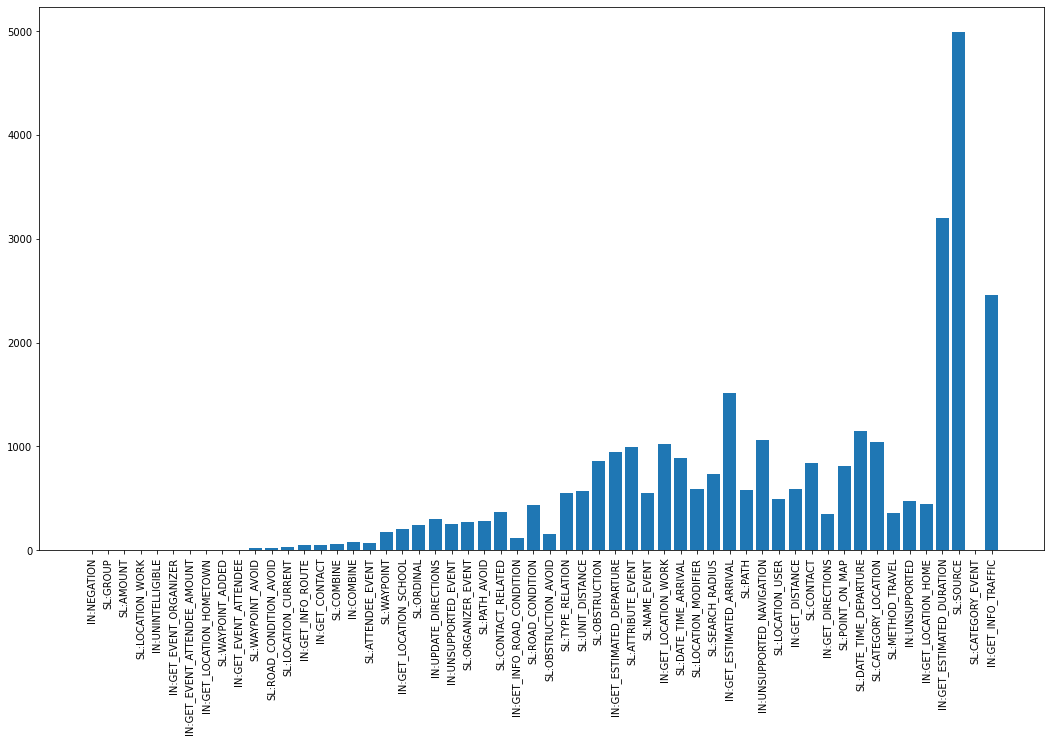

In [10]:
bars = {v[0]: len(t) for v, t in zip(all_schema_tokens_sorted, tiers)}

plt.figure(figsize=(18, 10))
plt.bar(bars.keys(), bars.values())
plt.xticks(rotation="vertical")
plt.show()

In [11]:
for t in all_schema_tokens:
    if tiers[-1].schema.str.contains(t).any():
        print(t)

IN:GET_EVENT
SL:DATE_TIME
SL:LOCATION


In [12]:
for t in all_schema_tokens:
    if tiers[-2].schema.str.contains(t).any():
        print(t)

SL:LOCATION
IN:GET_LOCATION


In [13]:
for t in all_schema_tokens:
    if tiers[-3].schema.str.contains(t).any():
        print(t)

SL:DATE_TIME
SL:DESTINATION
IN:GET_INFO_TRAFFIC
SL:LOCATION
IN:GET_LOCATION


### Combine all tiers with low frequency (less than 10 for TOP dataset) into a single tier

In [14]:
tiers_final = []

for token, _ in all_schema_tokens_sorted:
    tier = data[data.schema.str.contains(token)]

    for previous_tier in tiers_final:
        tier = tier.loc[tier.index.difference(previous_tier.index)]
    
    if len(tier) == 0:
        print(f"Token {token} does not have examples")
        continue

    if len(tier) < 10 and len(tiers_final) > 0:
        tiers_final[-1] = pd.concat([tiers_final[-1], tier])
        print(f"Merging the tier for token {token} of size {len(tier)} with the previous tier. Combined tier size {len(tiers_final[-1])}")
        continue

    tiers_final.append(tier)

assert sum(len(t) for t in tiers_final) == len(data)

Merging the tier for token SL:GROUP of size 1 with the previous tier. Combined tier size 2
Merging the tier for token SL:AMOUNT of size 2 with the previous tier. Combined tier size 4
Merging the tier for token SL:LOCATION_WORK of size 4 with the previous tier. Combined tier size 8
Merging the tier for token IN:UNINTELLIGIBLE of size 4 with the previous tier. Combined tier size 12
Merging the tier for token IN:GET_EVENT_ORGANIZER of size 4 with the previous tier. Combined tier size 16
Merging the tier for token IN:GET_EVENT_ATTENDEE_AMOUNT of size 4 with the previous tier. Combined tier size 20
Merging the tier for token IN:GET_LOCATION_HOMETOWN of size 4 with the previous tier. Combined tier size 24
Merging the tier for token SL:WAYPOINT_ADDED of size 4 with the previous tier. Combined tier size 28
Merging the tier for token IN:GET_EVENT_ATTENDEE of size 4 with the previous tier. Combined tier size 32
Token IN:COMBINE does not have examples
Token SL:OBSTRUCTION does not have examples
M

In [15]:
len(tiers_final)

46

In [16]:
[len(t) for t in tiers_final]

[32,
 18,
 22,
 34,
 46,
 48,
 60,
 82,
 70,
 176,
 205,
 238,
 298,
 254,
 271,
 281,
 363,
 118,
 433,
 154,
 548,
 571,
 862,
 941,
 996,
 555,
 1026,
 892,
 593,
 738,
 1511,
 575,
 1062,
 491,
 593,
 842,
 352,
 807,
 1152,
 1046,
 358,
 476,
 443,
 3201,
 4990,
 2455]

## Create corresponding validation and test sets

In [46]:
vocabularies = []
validation_tiers = []
test_tiers = []

tier_schema_vocab_total = set()

for tier in tiers_final[::-1]:
    tier_schema_vocab = reduce(set.union, map(utils.get_vocab_top_schema, tier.schema))
    tier_schema_vocab_total = tier_schema_vocab_total.union(tier_schema_vocab)
    vocabularies.append(tier_schema_vocab_total)

    validation_subset = validation_data[validation_data.schema.apply(lambda x: utils.get_vocab_top_schema(x).issubset(tier_schema_vocab_total))]
    test_subset = test_data[test_data.schema.apply(lambda x: utils.get_vocab_top_schema(x).issubset(tier_schema_vocab_total))]
    
    validation_tiers.append(validation_subset)
    test_tiers.append(test_subset)

validation_tiers = validation_tiers[::-1]
test_tiers = test_tiers[::-1]

In [41]:
print([len(v) for v in validation_tiers])

[4462, 4459, 4456, 4451, 4447, 4444, 4443, 4436, 4430, 4422, 4392, 4366, 4330, 4290, 4265, 4226, 4187, 4144, 4134, 4070, 4044, 3974, 3904, 3782, 3648, 3505, 3424, 3276, 3149, 3078, 2995, 2753, 2678, 2513, 2453, 2342, 2224, 2175, 2048, 1880, 1732, 1683, 1614, 1548, 1066, 344]


In [42]:
print([len(v) for v in test_tiers])

[9042, 9037, 9033, 9029, 9023, 9014, 9007, 8984, 8967, 8938, 8882, 8827, 8760, 8674, 8602, 8530, 8467, 8372, 8343, 8192, 8151, 7993, 7826, 7576, 7312, 7014, 6851, 6573, 6308, 6132, 5909, 5487, 5319, 5037, 4889, 4706, 4472, 4361, 4137, 3771, 3481, 3376, 3225, 3095, 2130, 692]


## Save all of the data

In [44]:
# !rm -rf ../data/top-incremental/

In [49]:
for i, (tier_train, tier_val, tier_test, vocab) in enumerate(zip(tiers_final, validation_tiers, test_tiers, vocabularies)):
    os.makedirs(f"../data/top-incremental/batch_{i}", exist_ok=True)

    tier_train.to_csv(f"../data/top-incremental/batch_{i}/train.csv", sep="\t", index=False, header=False)
    tier_val.to_csv(f"../data/top-incremental/batch_{i}/eval.csv", sep="\t", index=False, header=False)
    tier_test.to_csv(f"../data/top-incremental/batch_{i}/test.csv", sep="\t", index=False, header=False)
    
    with open(f"../data/top-incremental/batch_{i}/vocab.txt", "w") as f:
        f.write("\n".join(vocab))